## Árboles de decisión 

In [ ]:
install.packages("rpart.plot")
install.packages("rattle")

In [ ]:

library(rpart)
library(rpart.plot)
library(rattle)
library(pROC)
library(caret)

In [ ]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")

In [3]:
load("data.Rda")
dput(names(data))





c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y", "outcome")


### Árbol de decicisón, modelo inicial con todas las variables

In [4]:
arbol1 <- rpart(factor(outcome) ~ .,
                data = data,
                minbucket =30,
                method = "class",
                parms=list(split="gini"))

summary(arbol1)

Call:
rpart(formula = factor(outcome) ~ ., data = data, method = "class", 
    parms = list(split = "gini"), minbucket = 30)
  n= 6367 

          CP nsplit rel error    xerror        xstd
1 0.67522871      0 1.0000000 1.0000000 0.013957258
2 0.05242787      1 0.3247713 0.3247713 0.009884812
3 0.01000000      2 0.2723434 0.2741027 0.009200373

Variable importance
     hosp_y   highbp_nk diabetes_nk   stroke_nk   angina_nk    premi_nk 
         40          14          13          12          11           9 
  smstat_nk 
          1 

Node number 1: 6367 observations,    complexity param=0.6752287
  predicted class=No   expected loss=0.4463641  P(node) =1
    class counts:  3525  2842
   probabilities: 0.554 0.446 
  left son=2 (4442 obs) right son=3 (1925 obs)
  Primary splits:
      hosp_y      < 0.5 to the right, improve=1681.9660, (0 missing)
      highbp_nk   < 0.5 to the left,  improve= 565.9979, (0 missing)
      stroke_nk   < 0.5 to the left,  improve= 562.2713, (0 missing)
     

#### Gráficos explicativos del árbol de decisión

##### extra=101

extra=101: En cada nodo, Número de observaciones de cada clase y % de observaciones sobre el total

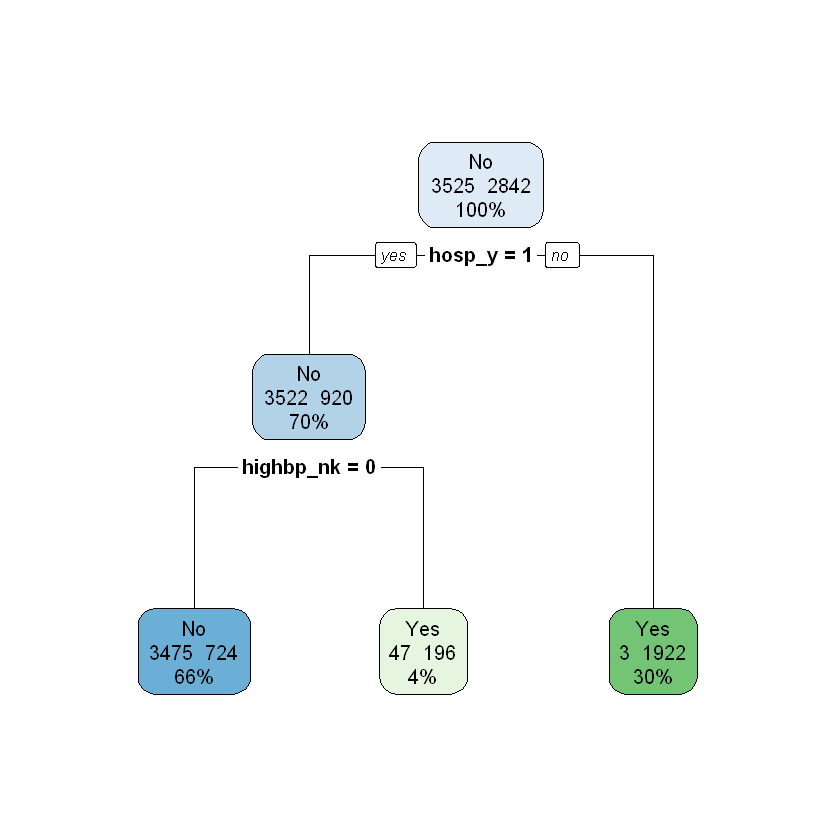

In [5]:
rpart.plot(arbol1,extra=101)

##### extra=105

extra=105 en cada nodo, % de observaciones de cada clase y % de observaciones sobre el total

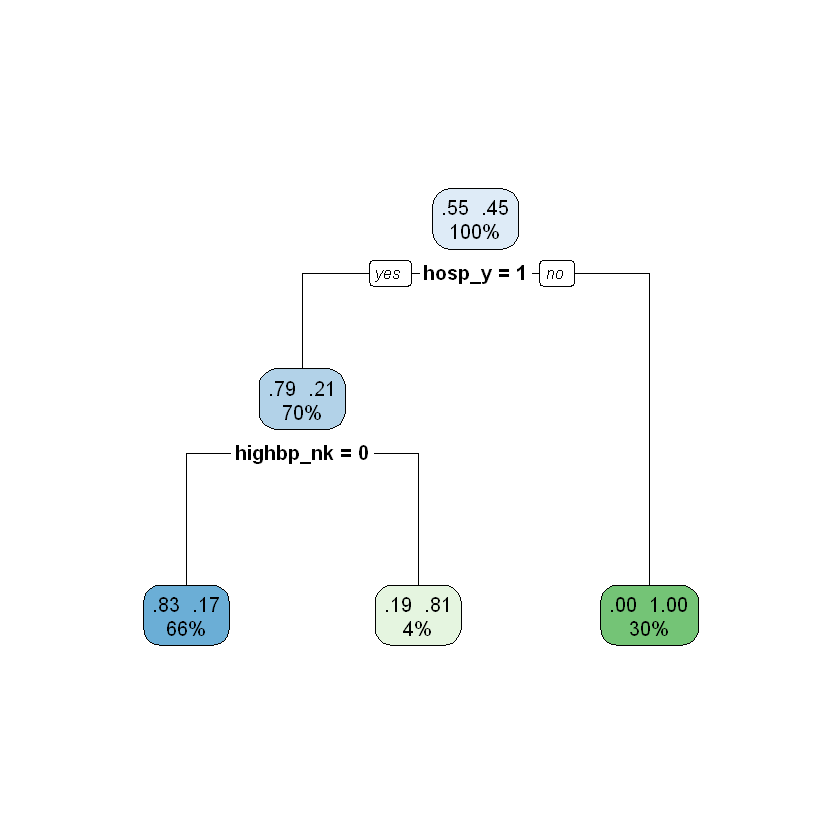

In [6]:
rpart.plot(arbol1,extra=105)

##### extra=5

extra=5:En cada nodo, solo % de observaciones de cada clase 


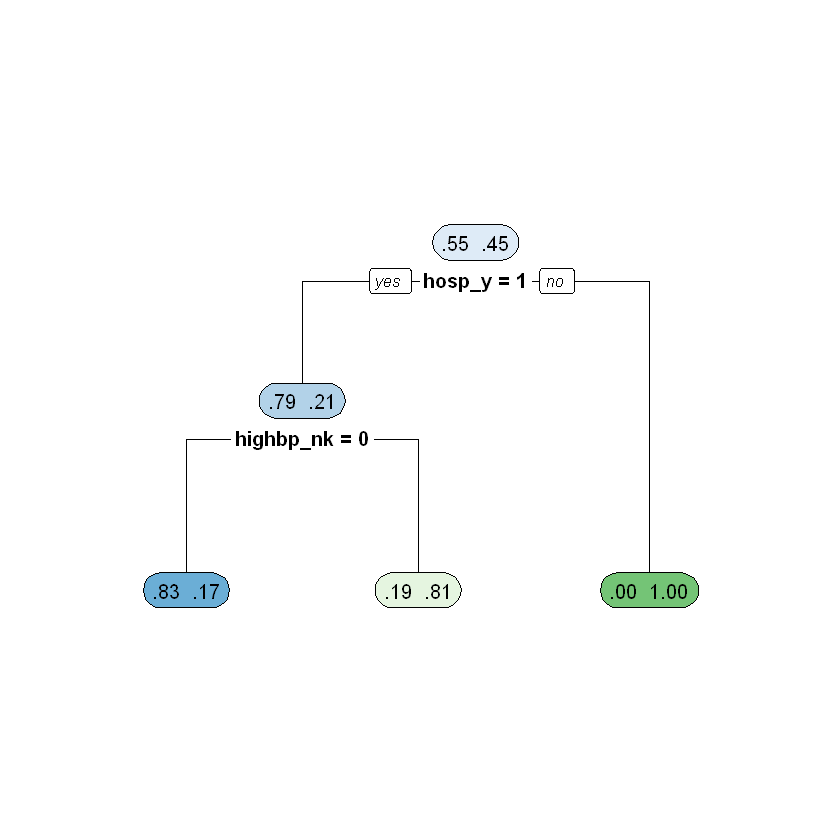

In [7]:
rpart.plot(arbol1,extra=5)

##### extra=1: 


extra=1, en cada nodo, solo Número de observaciones de cada clase 


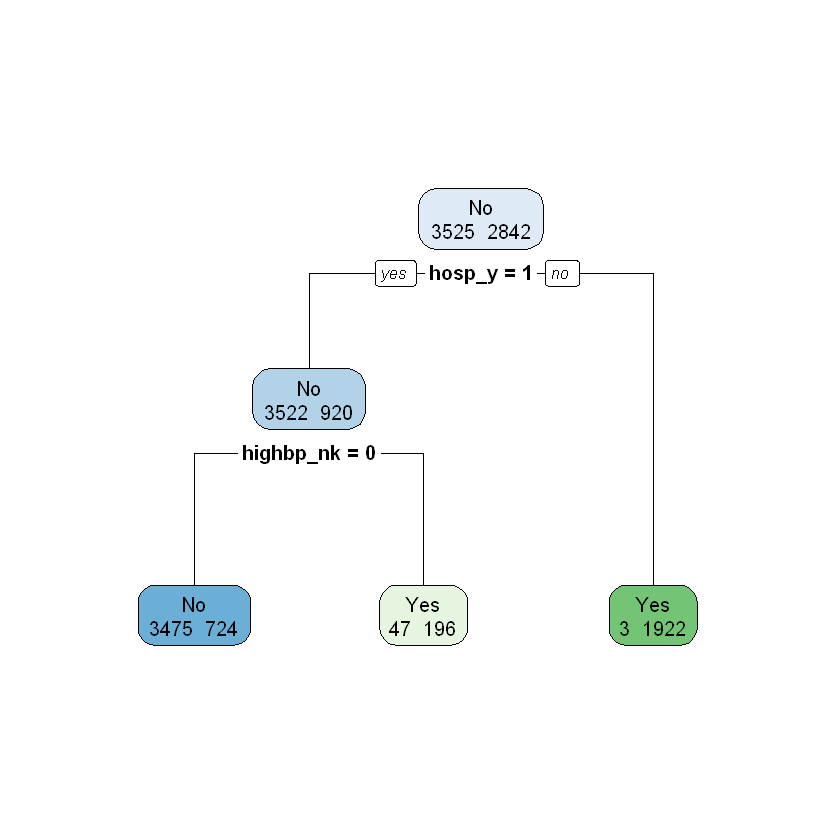

In [8]:

rpart.plot(arbol1,extra=1)

##### Nº de nodo. Pedir el número de nodo

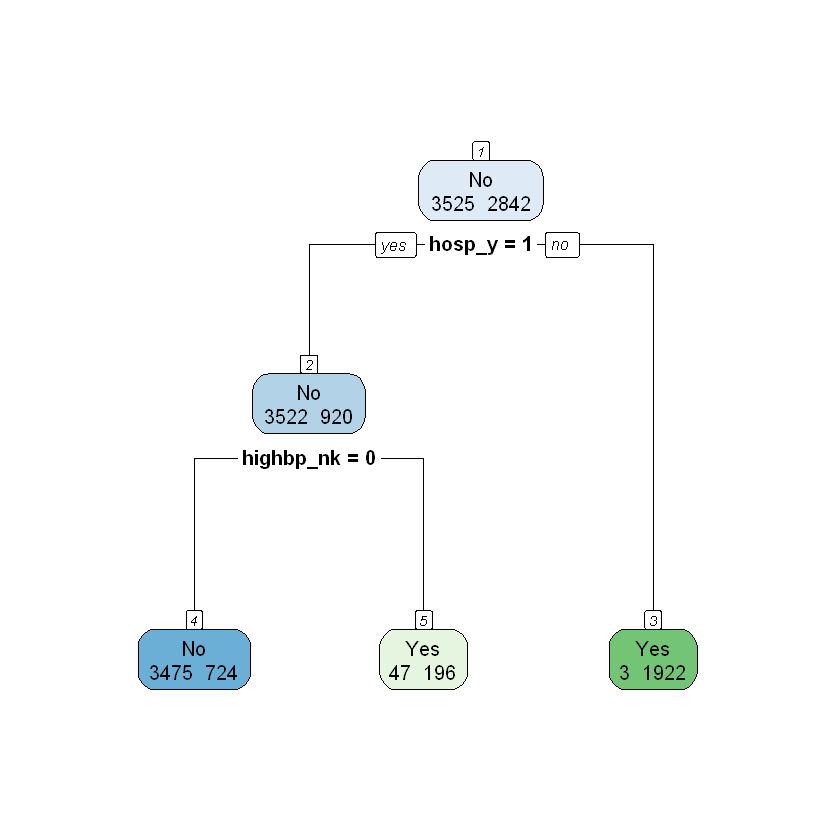

In [9]:
rpart.plot(arbol1,extra=1,nn=TRUE) 

##### Gráfico más completo

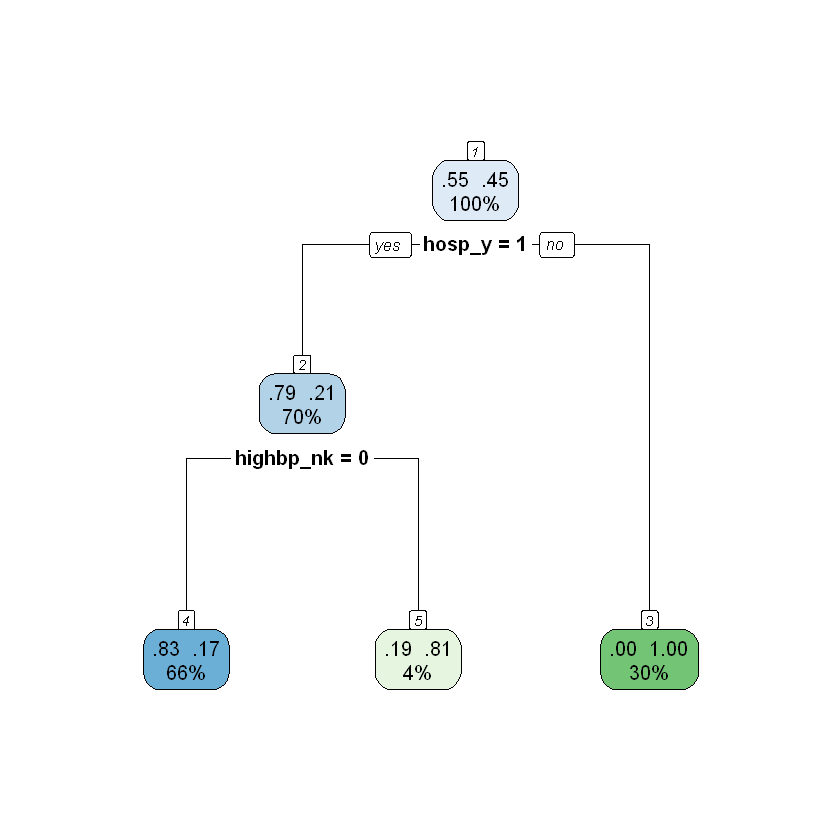

In [10]:

rpart.plot(arbol1,extra=105,nn=TRUE) 

#### Reglas decisión del arbol

In [11]:
asRules(arbol1)


 Rule number: 3 [factor(outcome)=Yes cover=1925 (30%) prob=1.00]
   hosp_y< 0.5

 Rule number: 5 [factor(outcome)=Yes cover=243 (4%) prob=0.81]
   hosp_y>=0.5
   highbp_nk>=0.5

 Rule number: 4 [factor(outcome)=No cover=4199 (66%) prob=0.17]
   hosp_y>=0.5
   highbp_nk< 0.5



#### Importancia de las variables del árbol

hosp_y   highbp_nk diabetes_nk   stroke_nk   angina_nk    premi_nk 
 1681.96561   588.43028   545.33990   518.17392   454.67198   401.42817 
  smstat_nk 
   39.53681

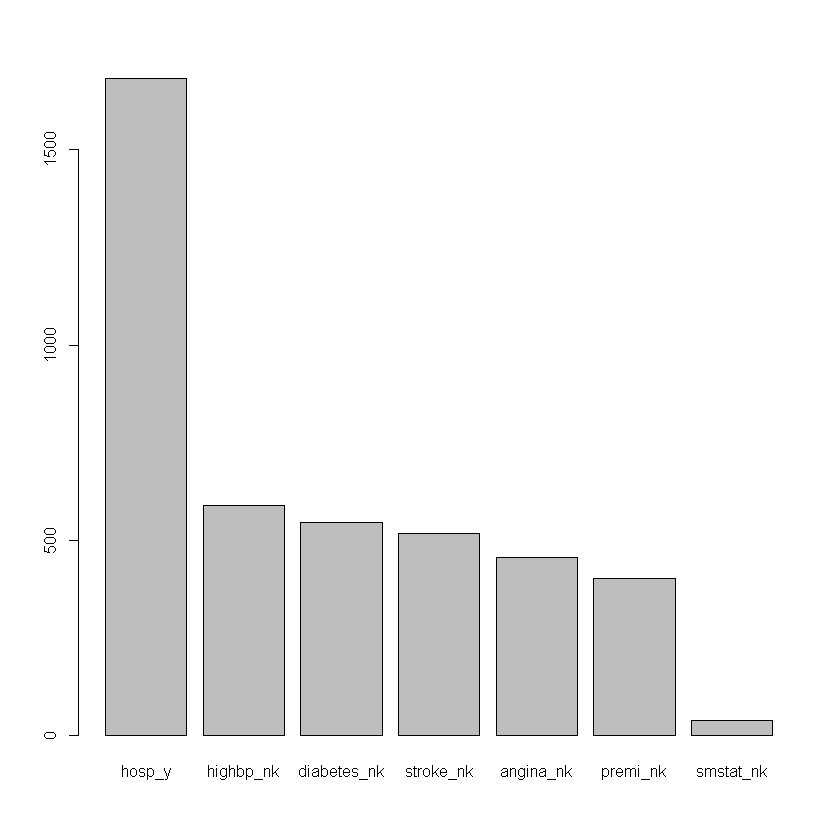

In [23]:
par(cex=0.8)
arbol1$variable.importance
barplot(arbol1$variable.importance)

Como se aprecia, la variable hosp_y es dominante, es a partir de ella que se va formando el árbol.No obstante no aparece exageradamente acusada la diferencia en importancia de esta con las 5 siguientes. 

In [12]:
#Lo grabamos en archivo gráfico

tiff(file="arbol1.tiff")
rpart.plot(arbol1,extra=1,tweak=1.2)
dev.off()


png 
  2

## Árbol de decicisón, modelo inicial con set de variables clásico

In [16]:
arbol2 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk, 
                data = data,
                minbucket =30,
                method = "class")

In [17]:
summary(arbol2)

Call:
rpart(formula = factor(outcome) ~ hosp_y + highbp_nk + age + 
    smstat_nk + angina_nk + yronset + stroke_y + angina_y + stroke_nk, 
    data = data, method = "class", minbucket = 30)
  n= 6367 

          CP nsplit rel error    xerror        xstd
1 0.67522871      0 1.0000000 1.0000000 0.013957258
2 0.05242787      1 0.3247713 0.3247713 0.009884812
3 0.01000000      2 0.2723434 0.2762139 0.009230777

Variable importance
   hosp_y highbp_nk stroke_nk angina_nk smstat_nk 
       46        16        14        13        10 

Node number 1: 6367 observations,    complexity param=0.6752287
  predicted class=No   expected loss=0.4463641  P(node) =1
    class counts:  3525  2842
   probabilities: 0.554 0.446 
  left son=2 (4442 obs) right son=3 (1925 obs)
  Primary splits:
      hosp_y    < 0.5        to the right, improve=1681.9660, (0 missing)
      highbp_nk < 0.5        to the left,  improve= 565.9979, (0 missing)
      stroke_nk < 0.5        to the left,  improve= 562.2713, (0 mis

hosp_y highbp_nk stroke_nk angina_nk smstat_nk 
1681.9656  588.4303  518.1739  454.6720  376.8037

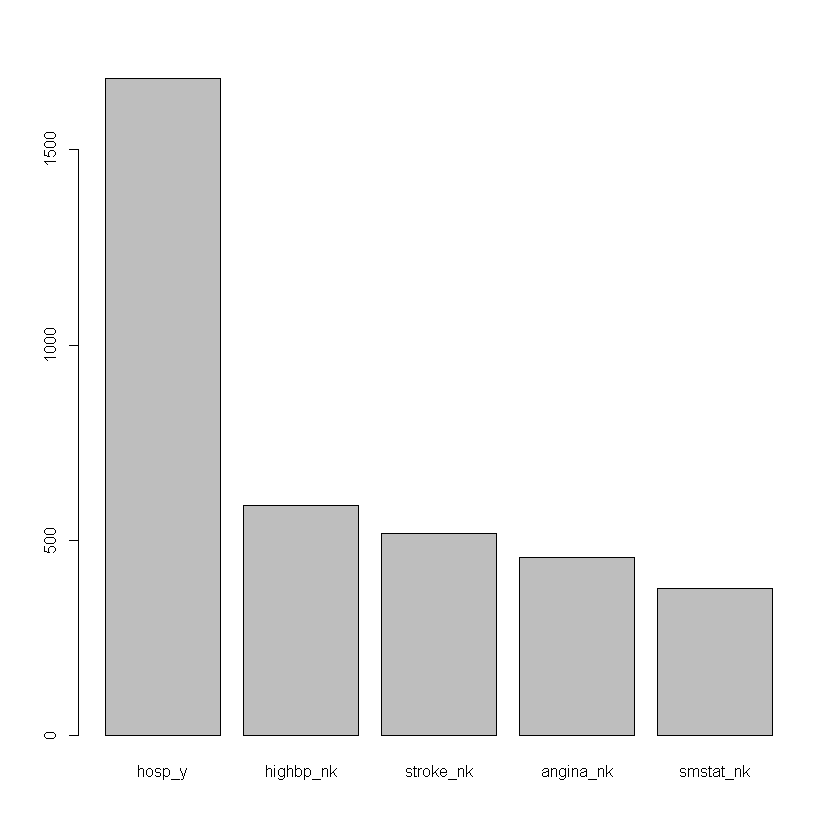

In [21]:
par(cex=0.8)
arbol2$variable.importance
barplot(arbol2$variable.importance)

La relación entre hosp_y es de 3 respecto a las otras 3 siguientes variables.

### Tuneado de la complejidad del árbol

In [ ]:
Cambiando el número de observaciones en el nodo final, el parámetro minibucket, de entre los valores 5,15,25,45,90,135

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


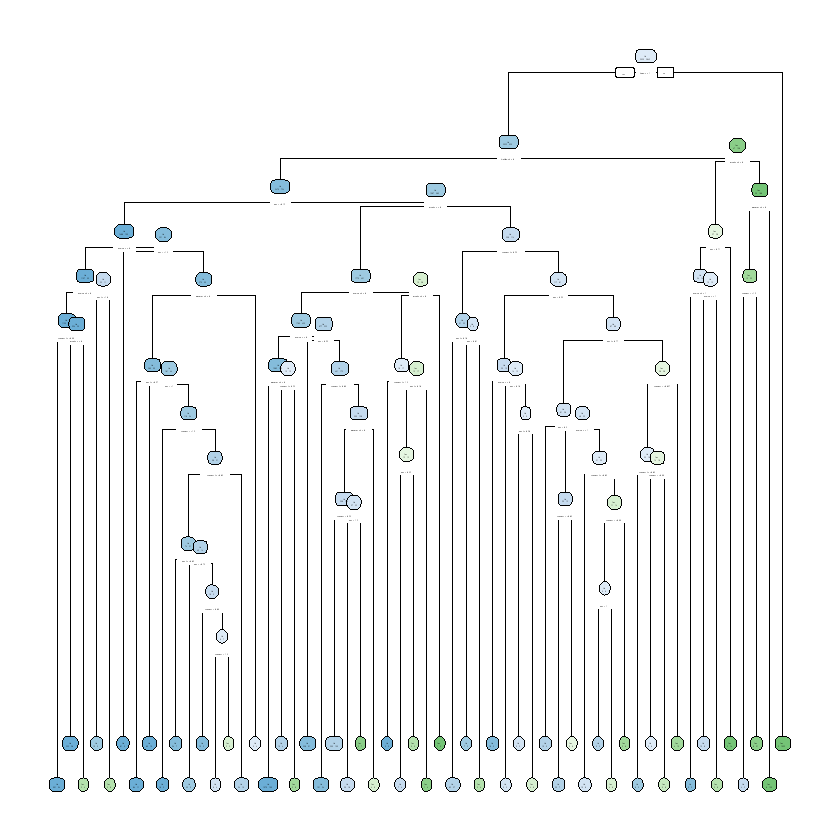

In [27]:
arbol21 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =5,
                 cp=0)

par(cex=0.8)
rpart.plot(arbol21,extra=1)



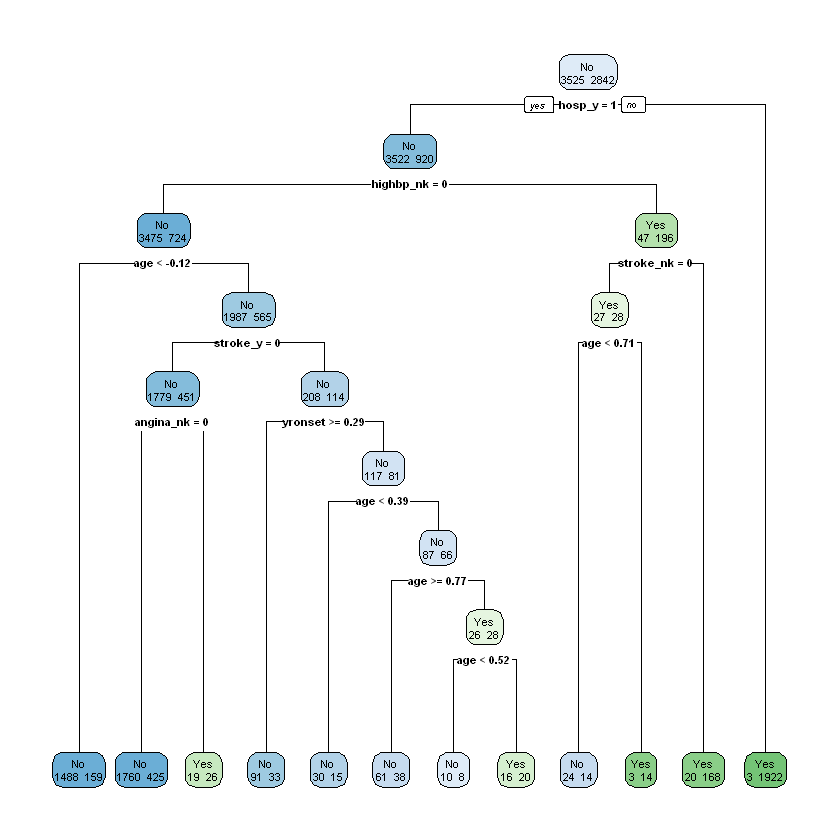

In [28]:
arbol22 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =15,
                 cp=0) 

rpart.plot(arbol22,extra=1)


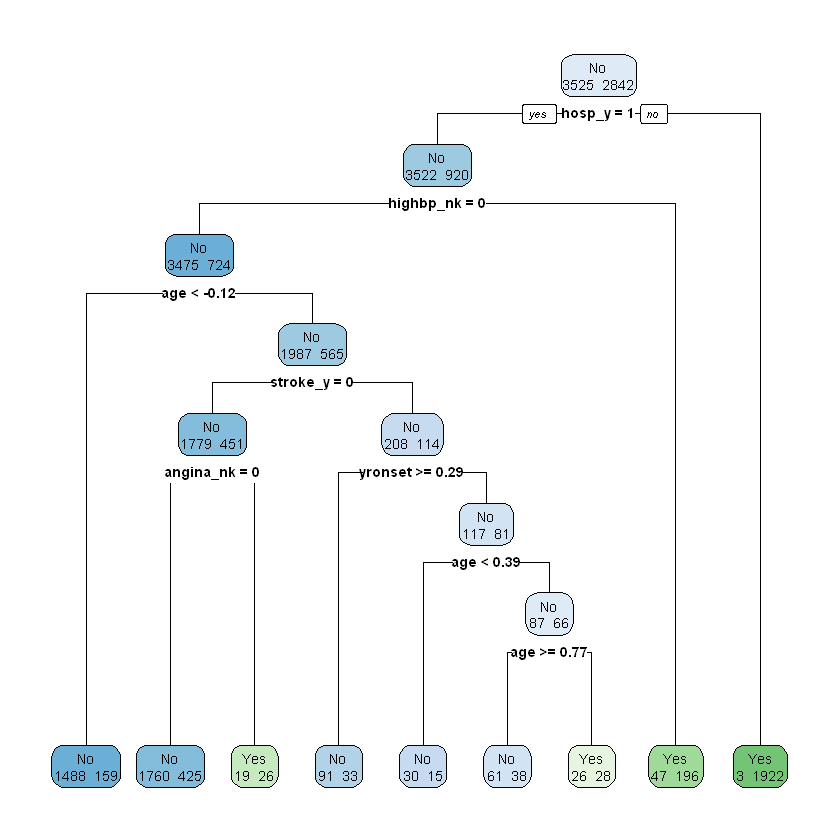

In [29]:
arbol23 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =25,
                 cp=0)

rpart.plot(arbol23,extra=1)

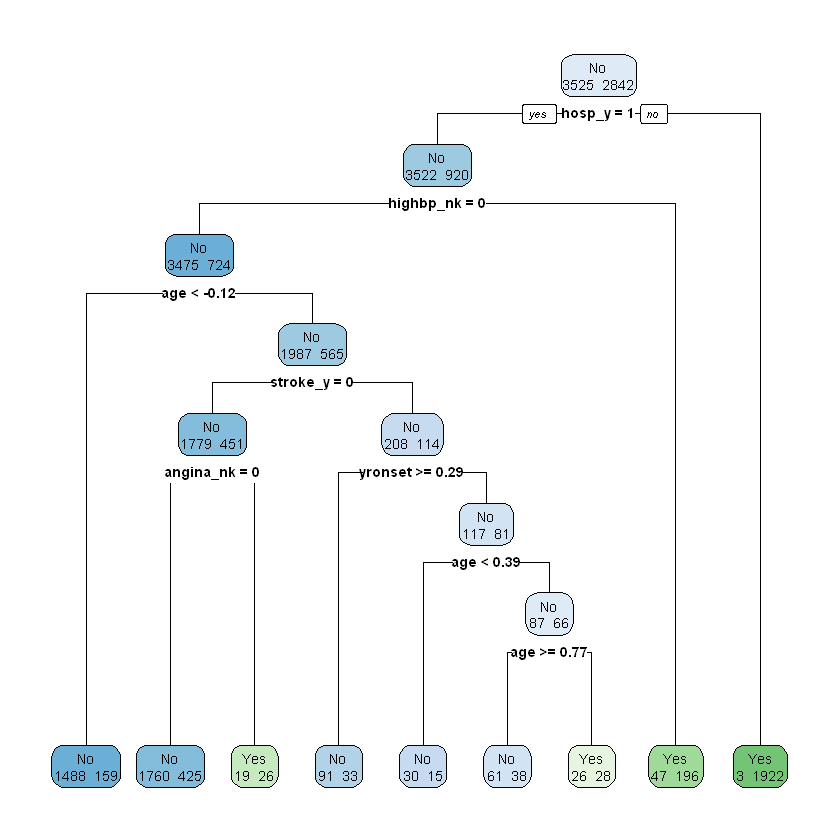

In [30]:
arbol24 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =45,
                 cp=0)

rpart.plot(arbol24,extra=1)


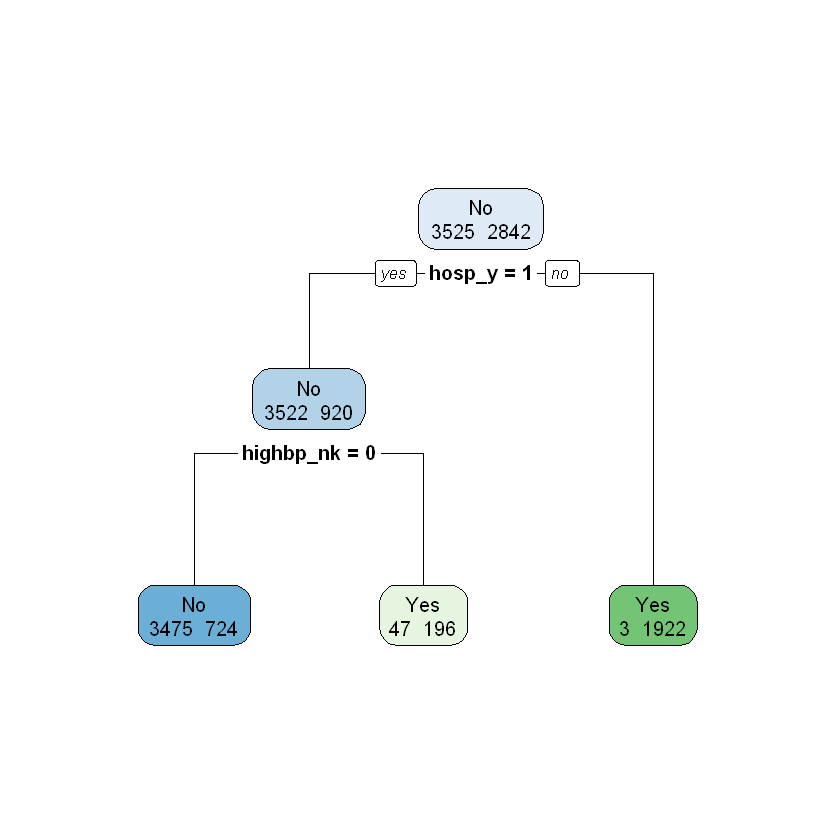

In [31]:
arbol25 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =90,
                 cp=0) 

rpart.plot(arbol25,extra=1)

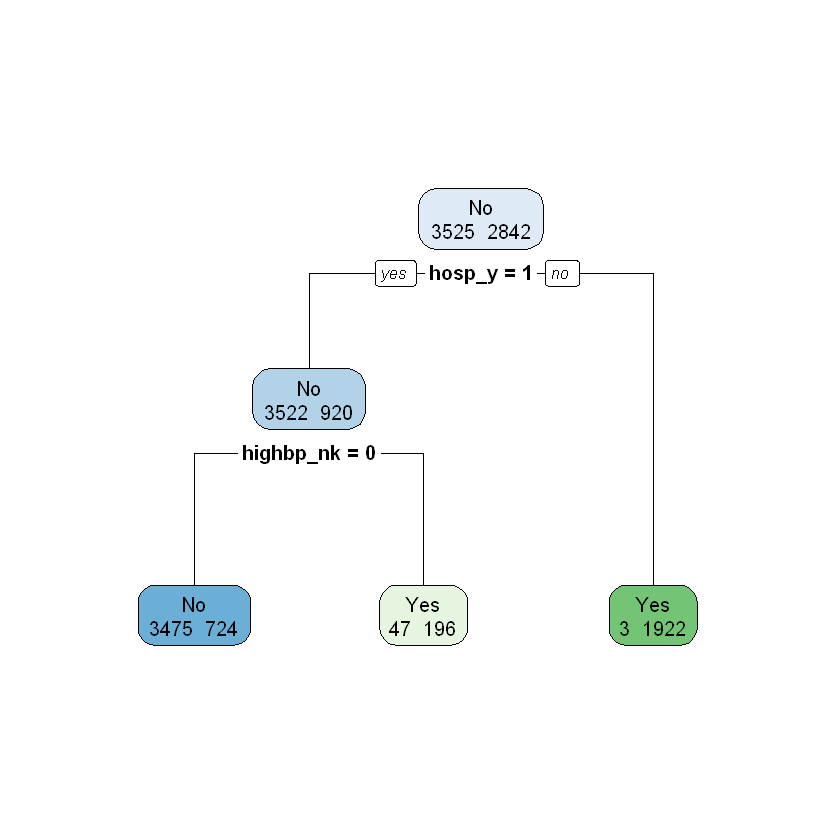

In [32]:
arbol26 <- rpart(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                 data = data,
                 minbucket =135,
                 cp=0)

rpart.plot(arbol26,extra=1)

Como se aprecia , con valores de minibucket igual o superior a 90 se obtiene el mismo árbol.Igulamente con valores de 25 y 45.

## Tuneado y evaluación capacidad predictiva con Caret.

### Arbol 

In [33]:
arbolgrid <-  expand.grid(cp=c(0))

control<-trainControl(method = "cv",number=10,classProbs=TRUE,savePredictions = "all") 


arbolcaret1<- train(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                   data=data,
                   method="rpart",
                   minbucket=30,
                   trControl=control,
                   tuneGrid=arbolgrid)

arbolcaret1



CART 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5729, 5731, 5731, 5730, 5730, 5730, ... 
Resampling results:

  Accuracy   Kappa    
  0.8683774  0.7287602

Tuning parameter 'cp' was held constant at a value of 0

In [35]:
sal<-arbolcaret1$pred



In [36]:
salconfu<-confusionMatrix(sal$pred,sal$obs)
salconfu



Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3368  681
       Yes  157 2161
                                          
               Accuracy : 0.8684          
                 95% CI : (0.8598, 0.8766)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7289          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9555          
            Specificity : 0.7604          
         Pos Pred Value : 0.8318          
         Neg Pred Value : 0.9323          
             Prevalence : 0.5536          
         Detection Rate : 0.5290          
   Detection Prevalence : 0.6359          
      Balanced Accuracy : 0.8579          
                                          
       'Positive' Class : No              
                        

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9075

Setting levels: control = No, case = Yes

Setting direction: controls < cases



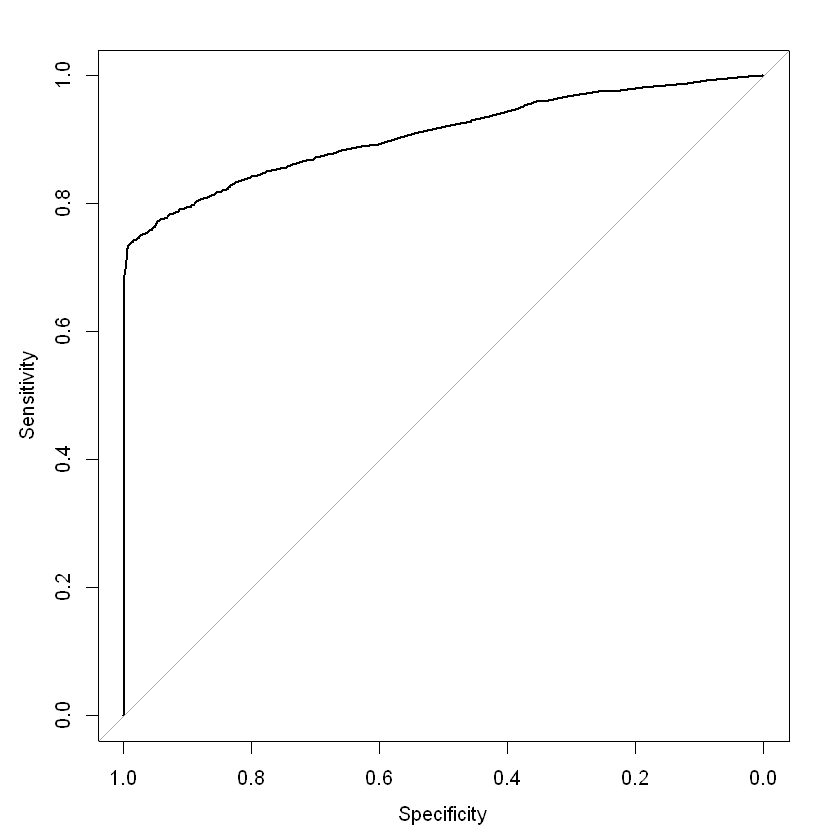

In [37]:
curvaroc<-roc(response=sal$obs,predictor=sal$Yes)
auc<-curvaroc$auc
auc
plot(roc(response=sal$obs,predictor=sal$Yes))


### tuneado del minibucket en bucle

In [39]:
for (minbu in seq(from=5, to=60, by=5))
{
print(minbu)
cat("/n")

arbolgrid <-  expand.grid(cp=c(0))
    
control<-trainControl(method = "cv",number=10,classProbs=TRUE,savePredictions = "all") 
    
arbolcaret2<- train(factor(outcome) ~ hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,
                   data=data,
                   method="rpart",
                   minbucket=minbu,
                   trControl=control,
                   tuneGrid=arbolgrid)

# arbolcaret

sal<-arbolcaret2$pred

salconfu<-confusionMatrix(sal$pred,sal$obs)
print(salconfu)

curvaroc<-roc(response=sal$obs,predictor=sal$Yes)
auc<-curvaroc$auc
print(auc)
# plot(roc(response=sal$obs,predictor=sal$Yes))
}

[1] 5
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3378  691
       Yes  147 2151
                                          
               Accuracy : 0.8684          
                 95% CI : (0.8598, 0.8766)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7287          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9583          
            Specificity : 0.7569          
         Pos Pred Value : 0.8302          
         Neg Pred Value : 0.9360          
             Prevalence : 0.5536          
         Detection Rate : 0.5305          
   Detection Prevalence : 0.6391          
      Balanced Accuracy : 0.8576          
                                          
       'Positive' Class : No              
                

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9073
[1] 10
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3405  695
       Yes  120 2147
                                          
               Accuracy : 0.872           
                 95% CI : (0.8635, 0.8801)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7358          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9660          
            Specificity : 0.7555          
         Pos Pred Value : 0.8305          
         Neg Pred Value : 0.9471          
             Prevalence : 0.5536          
         Detection Rate : 0.5348          
   Detection Prevalence : 0.6439          
      Balanced Accuracy : 0.8607          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9054
[1] 15
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3380  677
       Yes  145 2165
                                         
               Accuracy : 0.8709         
                 95% CI : (0.8624, 0.879)
    No Information Rate : 0.5536         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.734          
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9589         
            Specificity : 0.7618         
         Pos Pred Value : 0.8331         
         Neg Pred Value : 0.9372         
             Prevalence : 0.5536         
         Detection Rate : 0.5309         
   Detection Prevalence : 0.6372         
      Balanced Accuracy : 0.8603         
                                         
       'Positive' Class : No             
      

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9082
[1] 20
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3393  684
       Yes  132 2158
                                        
               Accuracy : 0.8718        
                 95% CI : (0.8634, 0.88)
    No Information Rate : 0.5536        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.7357        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9626        
            Specificity : 0.7593        
         Pos Pred Value : 0.8322        
         Neg Pred Value : 0.9424        
             Prevalence : 0.5536        
         Detection Rate : 0.5329        
   Detection Prevalence : 0.6403        
      Balanced Accuracy : 0.8609        
                                        
       'Positive' Class : No            
                          

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9082
[1] 25
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3385  694
       Yes  140 2148
                                          
               Accuracy : 0.869           
                 95% CI : (0.8605, 0.8772)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7299          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9603          
            Specificity : 0.7558          
         Pos Pred Value : 0.8299          
         Neg Pred Value : 0.9388          
             Prevalence : 0.5536          
         Detection Rate : 0.5316          
   Detection Prevalence : 0.6406          
      Balanced Accuracy : 0.8580          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9069
[1] 30
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3386  683
       Yes  139 2159
                                         
               Accuracy : 0.8709         
                 95% CI : (0.8624, 0.879)
    No Information Rate : 0.5536         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7339         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9606         
            Specificity : 0.7597         
         Pos Pred Value : 0.8321         
         Neg Pred Value : 0.9395         
             Prevalence : 0.5536         
         Detection Rate : 0.5318         
   Detection Prevalence : 0.6391         
      Balanced Accuracy : 0.8601         
                                         
       'Positive' Class : No             
      

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9074
[1] 35
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3409  684
       Yes  116 2158
                                         
               Accuracy : 0.8744         
                 95% CI : (0.866, 0.8824)
    No Information Rate : 0.5536         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7408         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9671         
            Specificity : 0.7593         
         Pos Pred Value : 0.8329         
         Neg Pred Value : 0.9490         
             Prevalence : 0.5536         
         Detection Rate : 0.5354         
   Detection Prevalence : 0.6428         
      Balanced Accuracy : 0.8632         
                                         
       'Positive' Class : No             
      

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9082
[1] 40
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3391  700
       Yes  134 2142
                                          
               Accuracy : 0.869           
                 95% CI : (0.8605, 0.8772)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7298          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9620          
            Specificity : 0.7537          
         Pos Pred Value : 0.8289          
         Neg Pred Value : 0.9411          
             Prevalence : 0.5536          
         Detection Rate : 0.5326          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.8578          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9092
[1] 45
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3410  703
       Yes  115 2139
                                          
               Accuracy : 0.8715          
                 95% CI : (0.8631, 0.8797)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7347          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9674          
            Specificity : 0.7526          
         Pos Pred Value : 0.8291          
         Neg Pred Value : 0.9490          
             Prevalence : 0.5536          
         Detection Rate : 0.5356          
   Detection Prevalence : 0.6460          
      Balanced Accuracy : 0.8600          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9037
[1] 50
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3386  680
       Yes  139 2162
                                          
               Accuracy : 0.8714          
                 95% CI : (0.8629, 0.8795)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7349          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9606          
            Specificity : 0.7607          
         Pos Pred Value : 0.8328          
         Neg Pred Value : 0.9396          
             Prevalence : 0.5536          
         Detection Rate : 0.5318          
   Detection Prevalence : 0.6386          
      Balanced Accuracy : 0.8606          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.909
[1] 55
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3401  695
       Yes  124 2147
                                          
               Accuracy : 0.8714          
                 95% CI : (0.8629, 0.8795)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7346          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9648          
            Specificity : 0.7555          
         Pos Pred Value : 0.8303          
         Neg Pred Value : 0.9454          
             Prevalence : 0.5536          
         Detection Rate : 0.5342          
   Detection Prevalence : 0.6433          
      Balanced Accuracy : 0.8601          
                                          
       'Positive' Class : No  

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9062
[1] 60
/nConfusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3404  687
       Yes  121 2155
                                          
               Accuracy : 0.8731          
                 95% CI : (0.8647, 0.8812)
    No Information Rate : 0.5536          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7382          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9657          
            Specificity : 0.7583          
         Pos Pred Value : 0.8321          
         Neg Pred Value : 0.9468          
             Prevalence : 0.5536          
         Detection Rate : 0.5346          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.8620          
                                          
       'Positive' Class : No 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.906


El valor de minibucket=40 es el que ofrece un mayor valor de AUC, con un área bajo la curva de 0,9092, por lo que se determina ese valor para la comparación mediante valororación cruzada y boxplot junto con el resto de modelos basados en algoritmos de red y de regresión logística ya estudiados. 

### Comparación de modelos

In [43]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
#Resultados de medias2
stopped after 500 iterations
  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587

In [42]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


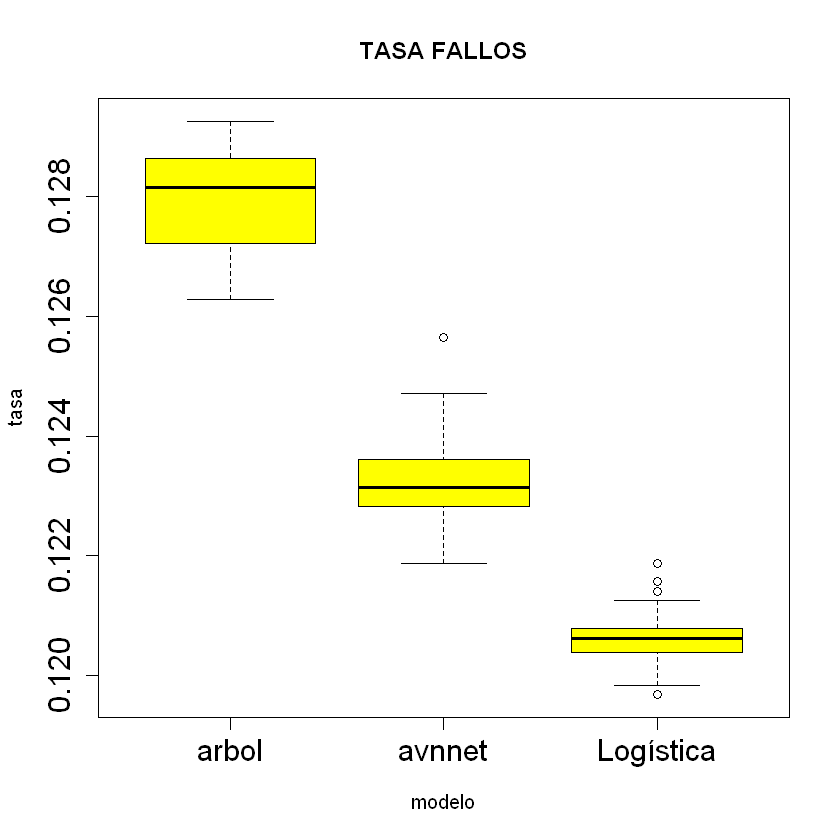

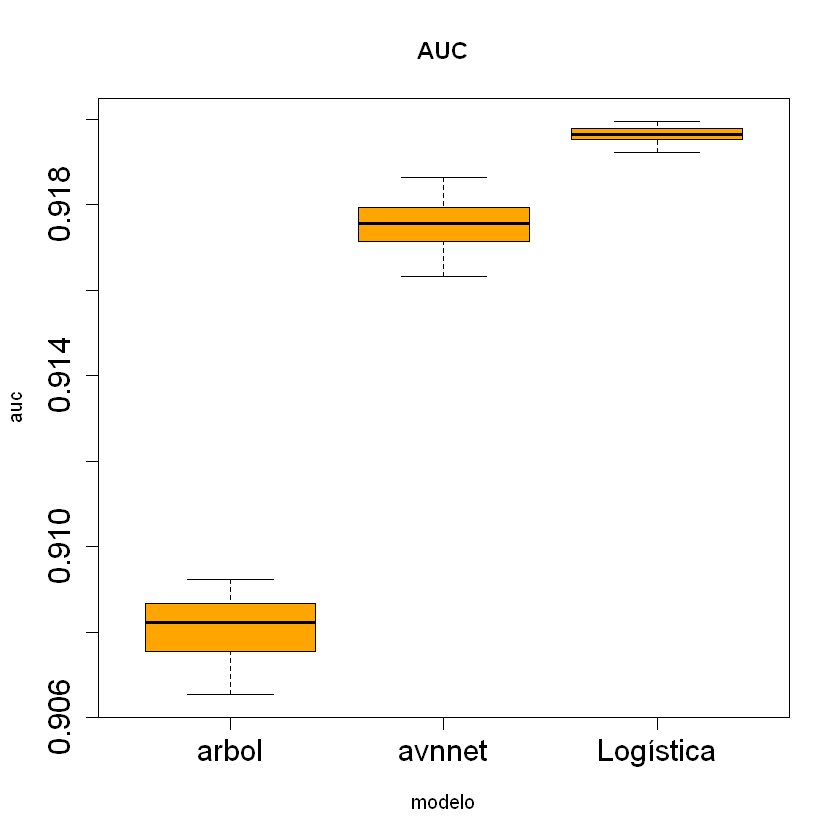

In [45]:
union3<-rbind(medias_1,medias_2,medias_3)
par(cex.axis=1.5)
boxplot(data=union3,tasa~modelo,main="TASA FALLOS",col="yellow")
boxplot(data=union3,auc~modelo,main="AUC",col="orange")

### Modelo ganador

Decididamente es la Logística de nuevo el modelo ganador, de forma que queda atrás el desempeño del árbol que ha sido tuneado concienzudamente. 